In [184]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


DistPlot

<Axes: xlabel='Alcohol', ylabel='Density'>

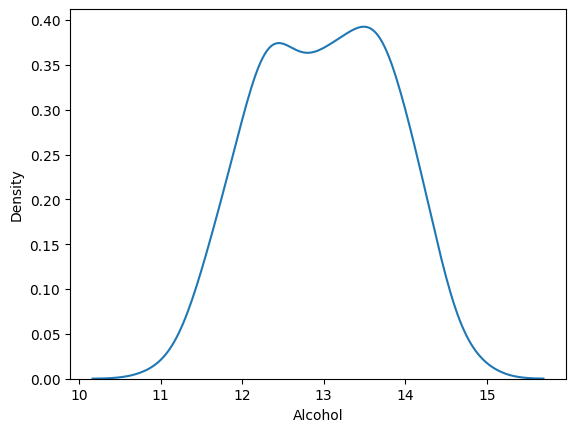

In [186]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

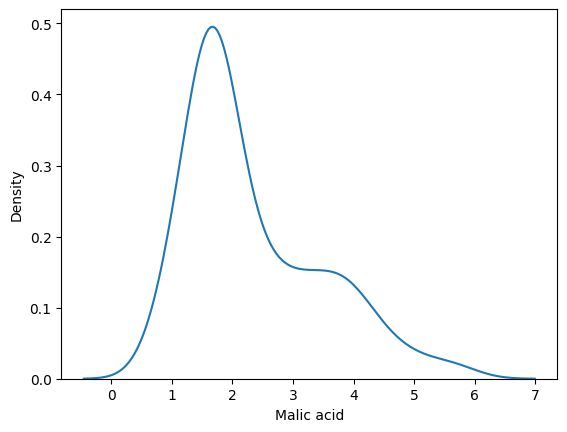

In [187]:
sns.kdeplot(df['Malic acid'])

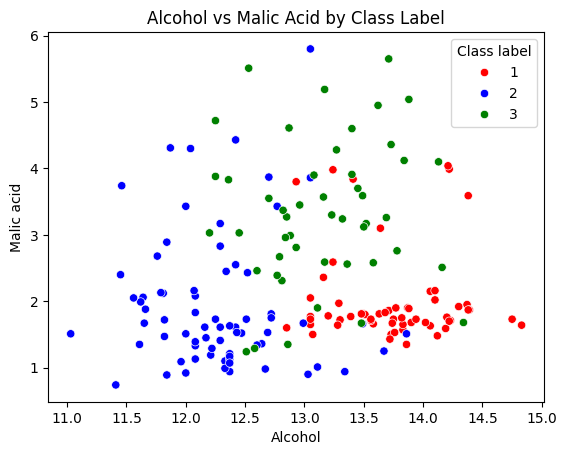

In [188]:
color_dict = {1: 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(x='Alcohol', y='Malic acid', hue='Class label', data=df, palette=color_dict)

plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.title("Alcohol vs Malic Acid by Class Label")
plt.show()

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train = df.drop('Class label', axis=1)
y_train = df['Class label']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.3, random_state=0
)
X_train.shape, X_test.shape

((124, 2), (54, 2))

MinMaxScaler

In [192]:
from sklearn.preprocessing import MinMaxScaler

In [193]:
scaler = MinMaxScaler()
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [194]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [195]:
X_train_scaled

array([[0.72043011, 0.20378151],
       [0.31989247, 0.08403361],
       [0.60215054, 0.71218487],
       [0.57258065, 0.56302521],
       [0.76075269, 0.1302521 ],
       [0.48924731, 0.5       ],
       [0.75537634, 0.67857143],
       [0.61021505, 0.17436975],
       [0.54301075, 0.62394958],
       [0.39784946, 0.07352941],
       [0.33870968, 0.1092437 ],
       [0.46774194, 0.53361345],
       [0.5188172 , 0.53781513],
       [0.70967742, 0.07563025],
       [0.57258065, 0.30882353],
       [0.36021505, 0.0105042 ],
       [0.38709677, 0.13235294],
       [0.20967742, 0.25840336],
       [0.59408602, 0.64915966],
       [0.82526882, 0.26680672],
       [0.15591398, 0.09663866],
       [0.52688172, 0.16386555],
       [0.46774194, 0.31512605],
       [0.65860215, 0.16386555],
       [0.1155914 , 0.5987395 ],
       [0.27956989, 0.26680672],
       [0.21236559, 0.12184874],
       [0.65053763, 0.59033613],
       [0.31451613, 0.44957983],
       [0.54301075, 0.17647059],
       [0.

In [196]:
X_test_scaled

array([[ 0.72849462,  0.16386555],
       [ 0.47311828,  0.37394958],
       [ 0.36021505,  0.05042017],
       [ 0.68010753,  0.17647059],
       [ 0.54301075,  1.03151261],
       [ 0.14247312,  0.24369748],
       [ 0.81451613,  0.26470588],
       [ 0.35752688,  0.61764706],
       [ 0.32795699,  0.17647059],
       [ 0.28225806,  0.19747899],
       [ 0.62634409,  0.35084034],
       [ 0.76612903,  0.87184874],
       [ 0.85215054,  0.18277311],
       [ 0.36021505,  0.03781513],
       [ 0.68548387,  0.35504202],
       [ 0.26075269,  0.00630252],
       [ 0.73387097,  0.13445378],
       [ 0.84946237,  0.14705882],
       [ 0.4327957 ,  0.0987395 ],
       [ 0.75268817,  0.15966387],
       [ 0.55913978,  0.02521008],
       [ 0.54301075,  0.15966387],
       [ 0.59408602,  0.35714286],
       [ 0.39784946,  0.17647059],
       [ 0.34946237,  0.04411765],
       [ 0.40053763,  0.32352941],
       [ 0.37634409,  0.13445378],
       [ 0.30376344,  0.1512605 ],
       [ 0.19623656,

In [197]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [198]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [199]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


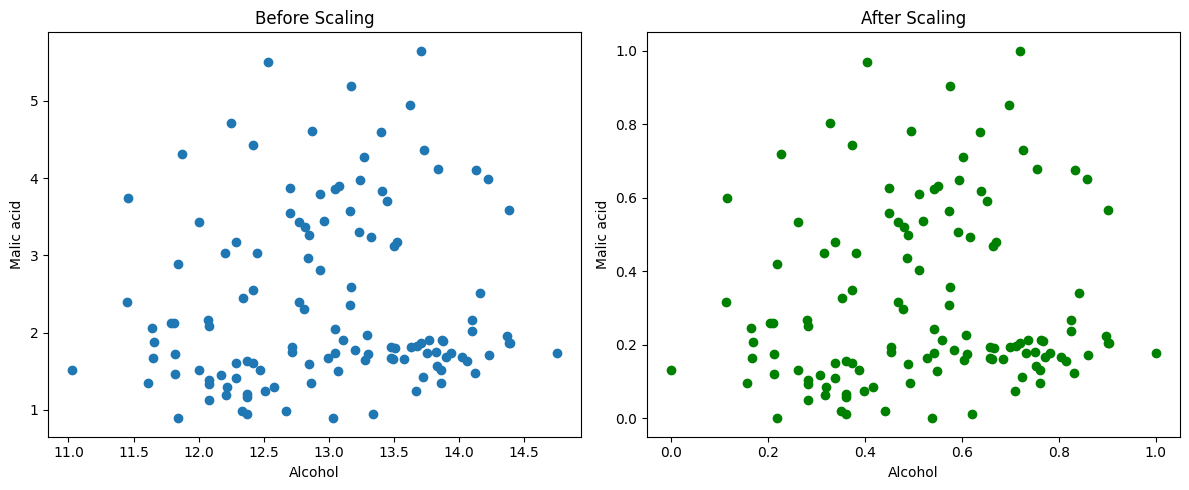

In [200]:
# Before Scaling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)    #1row, 2cols, 1plots
plt.scatter(X_train['Alcohol'], X_train['Malic acid'])
plt.title('Before Scaling')
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')

# After Scaling
plt.subplot(1, 2, 2)    #1row, 2cols, 1plots
plt.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], color='green')
plt.title('After Scaling')
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')

plt.tight_layout()
plt.show()

Probabiility Density Function

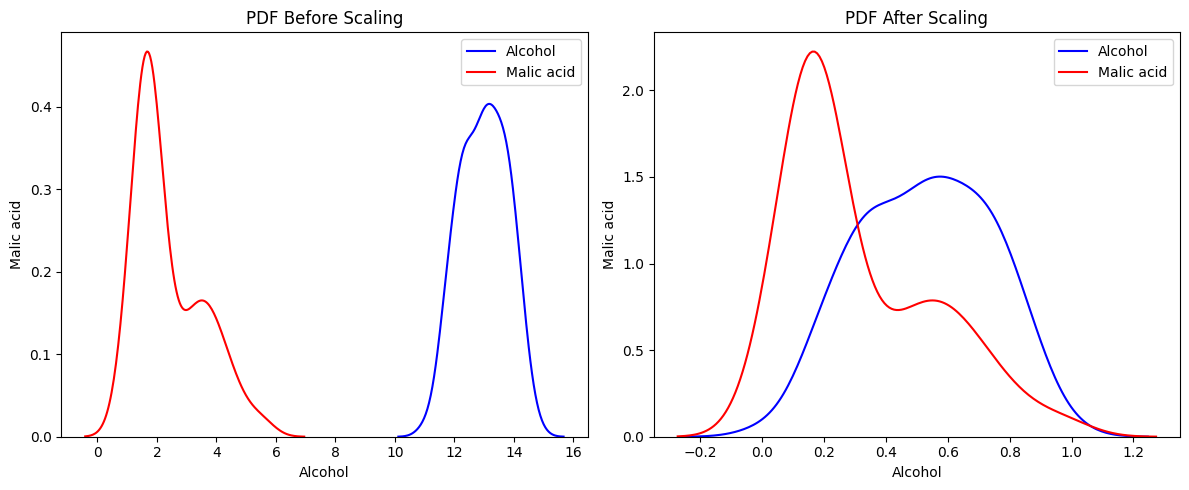

In [201]:
plt.figure(figsize=(12, 5))

# Before scaling
plt.subplot(1, 2, 1)
sns.kdeplot(x=X_train['Alcohol'], label="Alcohol", color="blue")
sns.kdeplot(x=X_train['Malic acid'], label="Malic acid", color="red")
plt.title("PDF Before Scaling")
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.legend()

# After scaling
plt.subplot(1, 2, 2)
sns.kdeplot(x=X_train_scaled['Alcohol'], label="Alcohol", color="blue")
sns.kdeplot(x=X_train_scaled['Malic acid'], label="Malic acid", color="red")
plt.title("PDF After Scaling")
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.legend()

plt.tight_layout()
plt.show()
